---
# Système de Recommandation d'Images

L’objectif de ce projet est de recommander des images en fonction des préférences de l’utilisateur. Pour construire ce système, vous devez vous assurer que toutes les tâches liées à l’acquisition, l’annotation, l’analyse et la visualisation des données sont automatisées.

## Tâches du Projet

1. Collecte de données  
2. Étiquetage et annotation  
3. Analyses de données  
4. Visualisation des données  
5. Système de recommandation  
6. Tests  
7. Rapport


## Importation des bibliothèques nécessaires

In [4]:
import os
import requests
from PIL import Image, ExifTags
import json
from PIL import Image, ExifTags
import json
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import random
import matplotlib.image as mpimg


# 1) Collecte de données

### Créer un dossier pour les images s'il n'existe pas

In [5]:
image_folder = "images"
os.makedirs(image_folder, exist_ok=True)
print(f" Dossier '{image_folder}' créé.")

 Dossier 'images' créé.


### Téléchargement des images

In [8]:
num_images = 100

for i in range(1, num_images + 1):
    url = f"https://picsum.photos/800/600"  
    response = requests.get(url)
    
    if response.status_code == 200:
        image_path = os.path.join(image_folder, f"image_{i}.jpg")
        with open(image_path, "wb") as f:
            f.write(response.content)
        print(f"Image {i} téléchargée.")
    else:
        print(f"Erreur téléchargement image {i}")


Image 1 téléchargée.
Image 2 téléchargée.
Image 3 téléchargée.
Image 4 téléchargée.
Image 5 téléchargée.
Image 6 téléchargée.
Image 7 téléchargée.
Image 8 téléchargée.
Image 9 téléchargée.
Image 10 téléchargée.
Image 11 téléchargée.
Image 12 téléchargée.
Image 13 téléchargée.
Image 14 téléchargée.
Image 15 téléchargée.
Image 16 téléchargée.
Image 17 téléchargée.
Image 18 téléchargée.
Image 19 téléchargée.
Image 20 téléchargée.
Image 21 téléchargée.
Image 22 téléchargée.
Image 23 téléchargée.
Image 24 téléchargée.
Image 25 téléchargée.
Image 26 téléchargée.
Image 27 téléchargée.
Image 28 téléchargée.
Image 29 téléchargée.
Image 30 téléchargée.
Image 31 téléchargée.
Image 32 téléchargée.
Image 33 téléchargée.
Image 34 téléchargée.
Image 35 téléchargée.
Image 36 téléchargée.
Image 37 téléchargée.
Image 38 téléchargée.
Image 39 téléchargée.
Image 40 téléchargée.
Image 41 téléchargée.
Image 42 téléchargée.
Image 43 téléchargée.
Image 44 téléchargée.
Image 45 téléchargée.
Image 46 téléchargé

# 2) É tiquetage et annotation

Les métadonnées associées à chaque image sont sauvegardées dans un fichier JSON afin de centraliser et structurer les informations relatives aux images pour une utilisation ultérieure.

In [25]:
# Générateurs de données fictives
FAUX_MODELES = ["Canon EOS 80D", "Nikon D3500", "Sony Alpha A7", "iPhone 13", "Samsung Galaxy S21"]
ANNEES_FAKE = list(range(2015, 2024))

def get_exif_data(img):
    """Extrait les données EXIF d'une image."""
    exif_data = {}
    try:
        raw_exif = img._getexif()
        if raw_exif:
            for tag_id, value in raw_exif.items():
                tag = ExifTags.TAGS.get(tag_id, tag_id)
                exif_data[tag] = value
    except Exception as e:
        print(f"Erreur lors de l'extraction des EXIF : {e}")
    return exif_data

def get_orientation(width, height):
    """Détermine l'orientation d'une image."""
    if width > height:
        return "paysage"
    elif height > width:
        return "portrait"
    return "carré"

def date_creation_fictive():
    """Génère une date de création fictive."""
    annee = random.choice(ANNEES_FAKE)
    mois = random.randint(1, 12)
    jour = random.randint(1, 28)
    heure = random.randint(0, 23)
    minute = random.randint(0, 59)
    seconde = random.randint(0, 59)
    return f"{annee:04}:{mois:02}:{jour:02} {heure:02}:{minute:02}:{seconde:02}"

def modele_fictif():
    """Renvoie un modèle d'appareil fictif."""
    return random.choice(FAUX_MODELES)

def extraire_metadata(image_folder):
    """Parcourt un dossier d'images et extrait les métadonnées, en injectant des données fictives si besoin."""
    metadata_list = []

    for filename in os.listdir(image_folder):
        if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        image_path = os.path.join(image_folder, filename)

        try:
            with Image.open(image_path) as img:
                width, height = img.size
                img_format = img.format
                orientation = get_orientation(width, height)
                exif_data = get_exif_data(img)

                date_creation = exif_data.get("DateTime")
                modele_appareil = exif_data.get("Model")

                # Injecter données fictives si absentes
                if not date_creation:
                    date_creation = date_creation_fictive()
                if not modele_appareil:
                    modele_appareil = modele_fictif()

                metadata = {
                    "filename": filename,
                    "width": width,
                    "height": height,
                    "format": img_format,
                    "orientation": orientation,
                    "date_creation": date_creation,
                    "modele_appareil": modele_appareil
                }

                metadata_list.append(metadata)
        except Exception as e:
            print(f"Erreur lors du traitement de l'image {filename} : {e}")

    return metadata_list

def sauvegarder_metadata(metadata_list, output_file="images_metadonnees.json"):
    """Sauvegarde les métadonnées extraites dans un fichier JSON."""
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(metadata_list, f, indent=4, ensure_ascii=False)
    print(f"Métadonnées enregistrées dans '{output_file}'")

metadata_list = extraire_metadata(image_folder)
sauvegarder_metadata(metadata_list)
print("Extraction terminée. Nombre total d'images :", len(metadata_list))

Métadonnées enregistrées dans 'images_metadonnees.json'
Extraction terminée. Nombre total d'images : 100


Il est anoter que certaines images les EXIF (Exchangeable Image File Format) qui contiennent des métadonnées sur la prise de vue, comme la date, l'heure, le modèle de l'appareil photo, etc etaient manquantes. Dans ce cas, nous allons les remplir avec des valeurs par défaut.

### Détection des couleurs dominantes à l’aide de KMeans

In [26]:
COLOR_NAMES = {
    "red":    (255, 0, 0),
    "green":  (0, 128, 0),
    "blue":   (0, 0, 255),
    "yellow": (255, 255, 0),
    "purple": (128, 0, 128),
    "orange": (255, 165, 0),
    "pink":   (255, 192, 203),
    "black":  (0, 0, 0),
    "white":  (255, 255, 255),
    "gray":   (128, 128, 128),
    "brown":  (165, 42, 42)
}

def closest_color_name(rgb_color):
    """
    Trouve le nom de couleur le plus proche du RGB donné.
    """
    rgb_color = np.array(rgb_color)
    return min(COLOR_NAMES.items(),
               key=lambda item: np.linalg.norm(rgb_color - np.array(item[1])))[0]

def extract_dominant_colors(image_path, n_colors=3):
    """
    Extrait les couleurs dominantes d'une image et retourne leurs noms.
    """
    try:
        # Chargement et prétraitement
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"Image introuvable ou illisible: {image_path}")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (100, 100))
        pixels = image.reshape(-1, 3)

        # Clustering K-Means
        kmeans = KMeans(n_clusters=n_colors, n_init=10, random_state=42)
        kmeans.fit(pixels)
        dominant_colors = kmeans.cluster_centers_.astype(int)

        # Conversion en noms de couleurs
        color_names = [closest_color_name(color) for color in dominant_colors]

        # Suppression des doublons tout en gardant l’ordre
        seen = set()
        return [name for name in color_names if not (name in seen or seen.add(name))]

    except Exception as e:
        print(f"Erreur lors du traitement de l'image {image_path}: {e}")
        return []

### Intégrez cette fonction pour enrichir automatiquement les métadonnées des images avec les noms des couleurs dominantes extraites à partir du contenu visuel.

In [27]:
with open("images_metadonnees.json", "r", encoding="utf-8") as f:
    metadata_list = json.load(f)

for item in metadata_list:
    image_path = os.path.join(image_folder, item["filename"])
    try:
        couleurs = extract_dominant_colors(image_path)
        item["couleurs_dominantes"] = couleurs
    except Exception as e:
        item["couleurs_dominantes"] = []
        print(f"Erreur pour {item['filename']}: {e}")

with open("image_tags.json", "w", encoding="utf-8") as f:
    json.dump(metadata_list, f, indent=4, ensure_ascii=False)

print("Couleurs dominantes extraites et enregistrées dans 'image_tags.json'.")
print("Script terminé avec succès.")

Couleurs dominantes extraites et enregistrées dans 'image_tags.json'.
Script terminé avec succès.


### Attribution automatique de tags à chaque image

In [28]:
def generer_tags_automatiques(metadata):
    """
    Génère une liste de tags basés sur les métadonnées d'une image.
    """
    tags = []

    couleurs = metadata.get("couleurs_dominantes", [])
    tags += [f"#{couleur}" for couleur in couleurs]

    orientation = metadata.get("orientation")
    if orientation:
        tags.append(f"#{orientation.lower()}")

    format_image = metadata.get("format")
    if format_image:
        tags.append(f"#{format_image.lower()}")

    modele_appareil = metadata.get("modele_appareil")
    if modele_appareil:
        marque = modele_appareil.split()[0].lower()
        tags.append(f"#{marque}")

    return tags

def ajouter_tags_aux_images(fichier_entree, fichier_sortie):
    """
    Ajoute des tags automatiques aux métadonnées d'un fichier JSON contenant des images.
    """
    try:
        with open(fichier_entree, "r", encoding="utf-8") as f:
            metadata_list = json.load(f)
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier : {e}")
        return

    for item in metadata_list:
        try:
            item["tags"] = generer_tags_automatiques(item)
        except Exception as e:
            item["tags"] = []
            print(f"Erreur pour {item.get('filename', 'image inconnue')} : {e}")

    try:
        with open(fichier_sortie, "w", encoding="utf-8") as f:
            json.dump(metadata_list, f, indent=4, ensure_ascii=False)
        print(f"Tags ajoutés et enregistrés dans '{fichier_sortie}'.")
    except Exception as e:
        print(f"Erreur lors de l'écriture du fichier : {e}")

ajouter_tags_aux_images("image_tags.json", "img_tags.json")
print("Tags automatiques générés et ajoutés aux métadonnées des images.")

Tags ajoutés et enregistrés dans 'img_tags.json'.
Tags automatiques générés et ajoutés aux métadonnées des images.


# 3) Analyses de données

### Construire automatiquement un profil de préférences pour chaque utilisateur à partir des images qu’il a choisies et taguées. Analyser les préférences d’un utilisateur

In [29]:

def construire_profil_utilisateur(images_selectionnees):
    couleurs, orientations, tailles, tags, formats = [], [], [], [], []

    for image in images_selectionnees:
        couleurs += image.get("couleurs_dominantes", [])
        orientations.append(image.get("orientation"))
        tags += image.get("tags", [])
        formats.append(image.get("format"))
        
        w, h = image.get("width", 0), image.get("height", 0)
        taille = "petite" if w < 300 else "moyenne" if w < 800 else "grande"
        tailles.append(taille)

    def plus_frequents(valeurs):
        return [val for val, _ in Counter(valeurs).most_common(3)]

    return {
        "couleurs_preferees": plus_frequents(couleurs),
        "orientation_preferee": Counter(orientations).most_common(1)[0][0],
        "taille_preferee": Counter(tailles).most_common(1)[0][0],
        "tags_favoris": plus_frequents(tags),
        "format_prefere": Counter(formats).most_common(1)[0][0]
    }


### Genérer des recommandations d'images basées sur les préférences de l'utilisateur

In [30]:
import random

with open("img_tags.json", "r", encoding="utf-8") as f:
    all_images = json.load(f)

N = 10000
profils_utilisateurs = []

for i in range(1, N + 1):
    images_selectionnees = random.sample(all_images, k=random.randint(5, 10))
    profil = construire_profil_utilisateur(images_selectionnees)

    profils_utilisateurs.append({
        "id": f"user_{i}",
        "nom": f"Utilisateur {i}",
        "email": f"user{i}@example.com",
        "images_selectionnees": [img["filename"] for img in images_selectionnees],
        **profil
    })

with open("profils_utilisateurs.json", "w", encoding="utf-8") as f:
    json.dump(profils_utilisateurs, f, indent=4, ensure_ascii=False)

print("Profils utilisateurs générés dans 'profils_utilisateurs.json'")

Profils utilisateurs générés dans 'profils_utilisateurs.json'


# 4) Visualisation des données

In [32]:
# Charger les métadonnées
with open("img_tags.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Créer un dossier pour enregistrer les graphiques
os.makedirs("graphes", exist_ok=True)

# === 1. Images par année ===
annees = []
for img in data:
    date_str = img.get("date_creation", "")
    try:
        if date_str != "Inconnue":
            annee = datetime.strptime(date_str, "%Y:%m:%d %H:%M:%S").year
            annees.append(annee)
    except Exception:
        pass

compteur_annees = Counter(annees)
plt.bar(compteur_annees.keys(), compteur_annees.values(), color="steelblue")
plt.title("Nombre d'images par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'images")
plt.savefig("graphes/images_par_annee.png")
plt.clf()

# === 2. Répartition des tailles ===
tailles = []
for img in data:
    w, h = img.get("width", 0), img.get("height", 0)
    if w < 300:
        tailles.append("petite")
    elif w < 800:
        tailles.append("moyenne")
    else:
        tailles.append("grande")

compteur_tailles = Counter(tailles)
plt.pie(compteur_tailles.values(), labels=compteur_tailles.keys(), autopct="%1.1f%%", colors=["#FF9999", "#66B2FF", "#99FF99"])
plt.title("Répartition des tailles d'image")
plt.savefig("graphes/tailles_images.png")
plt.clf()

# === 3. Orientation des images ===
orientations = [img.get("orientation", "inconnue") for img in data]
compteur_orientations = Counter(orientations)
plt.bar(compteur_orientations.keys(), compteur_orientations.values(), color="mediumpurple")
plt.title("Répartition des orientations")
plt.xlabel("Orientation")
plt.ylabel("Nombre d'images")
plt.savefig("graphes/orientations.png")
plt.clf()

# === 4. Modèles d'appareils photo ===
modeles = [img.get("modele_appareil", "Inconnu") for img in data]
compteur_modeles = Counter(modeles).most_common(10)  # top 10
labels, valeurs = zip(*compteur_modeles)
plt.barh(labels, valeurs, color="orange")
plt.title("Top 10 des modèles d'appareils photo")
plt.xlabel("Nombre d'images")
plt.tight_layout()
plt.savefig("graphes/modeles_appareils.png")
plt.clf()

# === 5. Couleurs dominantes ===
couleurs = []
for img in data:
    couleurs += img.get("couleurs_dominantes", [])
compteur_couleurs = Counter(couleurs)
plt.bar(compteur_couleurs.keys(), compteur_couleurs.values(), color=[couleur for couleur in compteur_couleurs.keys()])
plt.title("Couleurs dominantes dans les images")
plt.xlabel("Couleur")
plt.ylabel("Fréquence")
plt.savefig("graphes/couleurs_dominantes.png")
plt.clf()
print("Graphiques générés dans le dossier 'graphes/'")


Graphiques générés dans le dossier 'graphes/'


<Figure size 640x480 with 0 Axes>

### Visualisation personnalisée des images préférées et du profil utilisateur

In [4]:
def creer_dossier(path):
    if not os.path.exists(path):
        os.makedirs(path)

def visualiser_profil_utilisateur(profil, dossier_sortie="graphes_profils"):
    creer_dossier(dossier_sortie)
    
    user_id = profil.get("id", "inconnu")
    nom = profil.get("nom", f"Utilisateur_{user_id}")
    
    # Couleurs préférées
    couleurs = profil.get("couleurs_preferees", [])
    if couleurs:
        plt.figure(figsize=(6, 2))
        plt.bar(couleurs, [1]*len(couleurs), color=couleurs)
        plt.title(f"Couleurs préférées - {nom}")
        plt.yticks([])
        plt.savefig(f"{dossier_sortie}/profil_{user_id}_couleurs.png")
        plt.clf()
    
    # Orientation préférée
    orientation = profil.get("orientation_preferee", None)
    if orientation:
        plt.figure(figsize=(4, 3))
        plt.bar([orientation], [1], color='skyblue')
        plt.title(f"Orientation préférée - {nom}")
        plt.yticks([])
        plt.savefig(f"{dossier_sortie}/profil_{user_id}_orientation.png")
        plt.clf()

    # Taille préférée
    taille = profil.get("taille_preferee", None)
    if taille:
        plt.figure(figsize=(4, 3))
        plt.bar([taille], [1], color='lightgreen')
        plt.title(f"Taille préférée - {nom}")
        plt.yticks([])
        plt.savefig(f"{dossier_sortie}/profil_{user_id}_taille.png")
        plt.clf()

    # Tags favoris
    tags = profil.get("tags_favoris", [])
    if tags:
        plt.figure(figsize=(8, 2))
        plt.bar(tags, [1]*len(tags), color='orange')
        plt.title(f"Tags favoris - {nom}")
        plt.yticks([])
        plt.xticks(rotation=45, ha='right')
        plt.savefig(f"{dossier_sortie}/profil_{user_id}_tags.png")
        plt.clf()
    
    # Format préféré
    fmt = profil.get("format_prefere", None)
    if fmt:
        plt.figure(figsize=(4, 3))
        plt.bar([fmt], [1], color='violet')
        plt.title(f"Format préféré - {nom}")
        plt.yticks([])
        plt.savefig(f"{dossier_sortie}/profil_{user_id}_format.png")
        plt.clf()
    
    print(f"Graphiques générés pour {nom} (ID {user_id})")

# ==== Chargement des profils utilisateurs ====
with open("profils_utilisateurs.json", "r", encoding="utf-8") as f:
    profils = json.load(f)

# ==== Générer les graphes pour chaque utilisateur ====
for profil in range(9):
    visualiser_profil_utilisateur(profils[profil])

print("Tous les profils ont été visualisés.")


Graphiques générés pour Utilisateur 1 (ID user_1)
Graphiques générés pour Utilisateur 2 (ID user_2)
Graphiques générés pour Utilisateur 3 (ID user_3)
Graphiques générés pour Utilisateur 4 (ID user_4)


/tmp/ipykernel_5731/3848023482.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 2))


Graphiques générés pour Utilisateur 5 (ID user_5)
Graphiques générés pour Utilisateur 6 (ID user_6)
Graphiques générés pour Utilisateur 7 (ID user_7)
Graphiques générés pour Utilisateur 8 (ID user_8)
Graphiques générés pour Utilisateur 9 (ID user_9)
Tous les profils ont été visualisés.


<Figure size 600x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 400x300 with 0 Axes>

# 5) Système de recommandation

### Algorithme de filtrage basé sur le contenu (Content-Based Filtering)
Objectif : Recommander des images similaires à celles que l'utilisateur a aimées ou taguées.


In [18]:
def recommander_images(profil_utilisateur, images_metadata, top_n=5):
    recommandations = []

    for image in images_metadata:
        score = 0

        # Comparaison des couleurs
        couleurs_image = image.get("couleurs_dominantes", [])
        couleurs_pref = profil_utilisateur.get("couleurs_preferees", [])
        score += sum(1 for c in couleurs_image if c in couleurs_pref)

        # Orientation
        if image.get("orientation") == profil_utilisateur.get("orientation_preferee"):
            score += 1

        # Taille
        w, h = image.get("width", 0), image.get("height", 0)
        taille = "petite" if w < 300 else "moyenne" if w < 800 else "grande"
        if taille == profil_utilisateur.get("taille_preferee"):
            score += 1

        # Tags
        tags_image = set(image.get("tags", []))
        tags_favoris = set(profil_utilisateur.get("tags_favoris", []))
        score += len(tags_image & tags_favoris)

        # Format
        if image.get("format") == profil_utilisateur.get("format_prefere"):
            score += 1

        recommandations.append((image, score))

    # Trier les images par score décroissant
    recommandations.sort(key=lambda x: x[1], reverse=True)

    # Retourner les top_n images
    return [img for img, score in recommandations[:top_n]]

In [19]:
# Charger les données utilisateur et images
with open("profils_utilisateurs.json", "r", encoding="utf-8") as f:
    profils = json.load(f)

with open("img_tags.json", "r", encoding="utf-8") as f:
    images_metadata = json.load(f)

# Recommander des images pour le dixième utilisateur
utilisateur = profils[10]
top_images = recommander_images(utilisateur, images_metadata, top_n=5)

# Afficher les fichiers recommandés
for img in top_images:
    print(f"📸 {img['filename']} - Couleurs: {img.get('couleurs_dominantes')} - Tags: {img.get('tags')}")


📸 image_83.jpg - Couleurs: ['white', 'black', 'gray'] - Tags: ['#white', '#black', '#gray', '#paysage', '#jpeg', '#iphone']
📸 image_24.jpg - Couleurs: ['black', 'gray', 'white'] - Tags: ['#black', '#gray', '#white', '#paysage', '#jpeg', '#canon']
📸 image_13.jpg - Couleurs: ['gray', 'black', 'white'] - Tags: ['#gray', '#black', '#white', '#paysage', '#jpeg', '#sony']
📸 image_15.jpg - Couleurs: ['black', 'white', 'gray'] - Tags: ['#black', '#white', '#gray', '#paysage', '#jpeg', '#nikon']
📸 image_99.jpg - Couleurs: ['white', 'black', 'gray'] - Tags: ['#white', '#black', '#gray', '#paysage', '#jpeg', '#samsung']


In [9]:
def afficher_recommandations(images, dossier_images, titre="Recommandations pour l'utilisateur"):
    nb_images = len(images)
    nb_colonnes = 5
    nb_lignes = (nb_images + nb_colonnes - 1) // nb_colonnes

    plt.figure(figsize=(18, 4 * nb_lignes))
    plt.suptitle(titre, fontsize=16)

    for i, img_meta in enumerate(images):
        filepath = os.path.join(dossier_images, img_meta["filename"])
        try:
            image = mpimg.imread(filepath)
        except Exception as e:
            print(f"Erreur lecture image {filepath}: {e}")
            continue

        plt.subplot(nb_lignes, nb_colonnes, i + 1)
        plt.imshow(image)
        plt.axis('off')

        couleurs = ", ".join(img_meta.get("couleurs_dominantes", []))
        tags = " ".join(img_meta.get("tags", []))
        caption = f"{img_meta['filename']}\n🎨 {couleurs}\n🏷️ {tags}"

        plt.title(caption, fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

/tmp/ipykernel_5731/1986799398.py:27: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipykernel_5731/1986799398.py:27: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


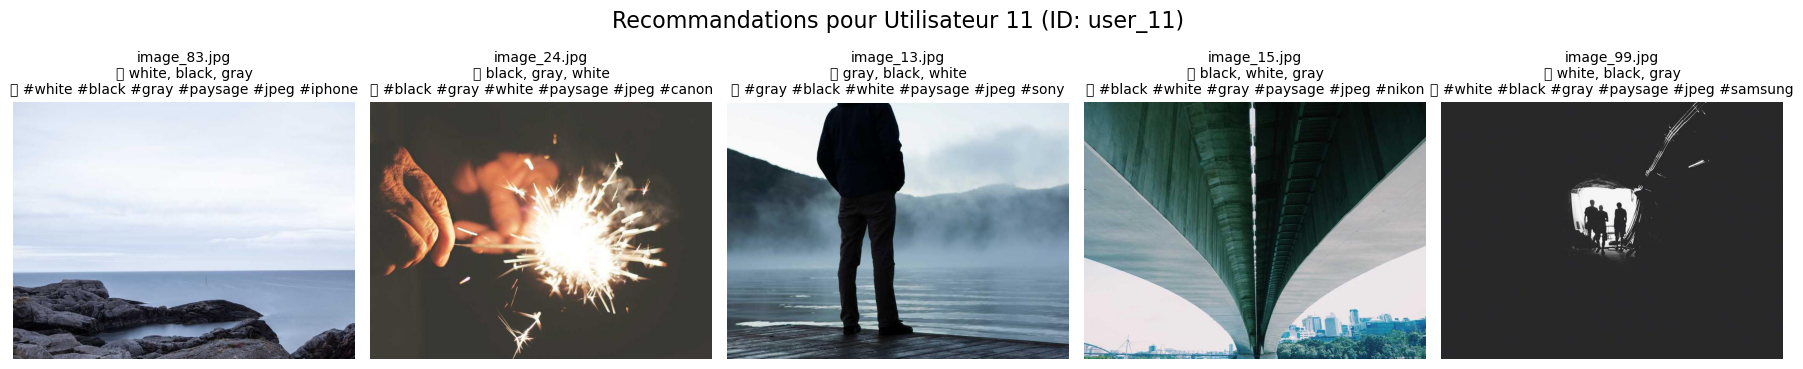

In [29]:
afficher_recommandations(top_images, image_folder, titre=f"Recommandations pour {utilisateur['nom']} (ID: {utilisateur['id']})")

### Algorithme : Filtrage collaboratif "user-based" simplifiéPrétraitement

### Étapes de l’algorithme :
1. Pour chaque utilisateur, tu as déjà un profil avec ses préférences (profil_utilisateur).

2. Calcule une similarité entre deux utilisateurs (par exemple, Jaccard ou Cosine sur les tags et couleurs).

3. Trouve les utilisateurs les plus similaires.

4. Récupère les images qu’ils ont sélectionnées (et que l’utilisateur actuel n’a pas encore vues).

5. Recommande les images les plus fréquentes parmi ces voisins proches.

In [1]:
import json
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

def convertir_profil_vecteur(profil, vocab_tags, vocab_couleurs):
    vecteur = []

    for couleur in vocab_couleurs:
        vecteur.append(1 if couleur in profil.get("couleurs_preferees", []) else 0)
    
    for tag in vocab_tags:
        vecteur.append(1 if tag in profil.get("tags_favoris", []) else 0)

    return np.array(vecteur)

def filtrage_collaboratif_utilisateur(profil_cible, tous_les_profils, historique_images, top_k=3, nb_recos=5):
    vocab_tags = list({tag for p in tous_les_profils for tag in p.get("tags_favoris", [])})
    vocab_couleurs = list({c for p in tous_les_profils for c in p.get("couleurs_preferees", [])})

    vecteur_cible = convertir_profil_vecteur(profil_cible, vocab_tags, vocab_couleurs)

    similarites = []
    for autre_profil in tous_les_profils:
        if autre_profil["id"] == profil_cible["id"]:
            continue
        vecteur_autre = convertir_profil_vecteur(autre_profil, vocab_tags, vocab_couleurs)
        sim = cosine_similarity([vecteur_cible], [vecteur_autre])[0][0]
        similarites.append((autre_profil["id"], sim))

    similarites.sort(key=lambda x: x[1], reverse=True)
    voisins = [uid for uid, sim in similarites[:top_k]]

    compteur_images = defaultdict(int)
    for voisin_id in voisins:
        for img in historique_images.get(str(voisin_id), []):
            if img not in historique_images.get(str(profil_cible["id"]), []):
                compteur_images[img] += 1

    recommandations = sorted(compteur_images.items(), key=lambda x: x[1], reverse=True)
    return [img for img, count in recommandations[:nb_recos]]


In [6]:
def generer_historique_images(fichier_profils, fichier_images, nb_images_par_utilisateur=3, sortie="historique_images.json"):
    # Charger les profils d'utilisateurs
    with open(fichier_profils, "r", encoding="utf-8") as f:
        profils = json.load(f)

    # Charger les métadonnées d'images
    with open(fichier_images, "r", encoding="utf-8") as f:
        images = json.load(f)
        filenames = [img["filename"] for img in images]

    historique = {}

    for profil in profils:
        utilisateur_id = str(profil["id"])
        images_selectionnees = random.sample(filenames, min(nb_images_par_utilisateur, len(filenames)))
        historique[utilisateur_id] = images_selectionnees

    # Enregistrer le fichier JSON
    with open(sortie, "w", encoding="utf-8") as f:
        json.dump(historique, f, indent=4, ensure_ascii=False)

    print(f"Fichier '{sortie}' généré avec {len(profils)} utilisateurs.")

# Exemple d'utilisation
generer_historique_images("profils_utilisateurs.json", "img_tags.json")

Fichier 'historique_images.json' généré avec 10000 utilisateurs.


In [8]:
# Charger les fichiers
with open("profils_utilisateurs.json", "r", encoding="utf-8") as f:
    profils = json.load(f)

with open("historique_images.json", "r", encoding="utf-8") as f:
    historique = json.load(f)

# Choisir un utilisateur (ex: utilisateur avec id = 1)
profil_cible = next(p for p in profils if p["id"] == "user_9713")

# Obtenir les images recommandées
reco_images = filtrage_collaboratif_utilisateur(profil_cible, profils, historique)

print("📸 Images recommandées :", reco_images)


📸 Images recommandées : ['image_69.jpg', 'image_73.jpg', 'image_57.jpg', 'image_45.jpg', 'image_81.jpg']


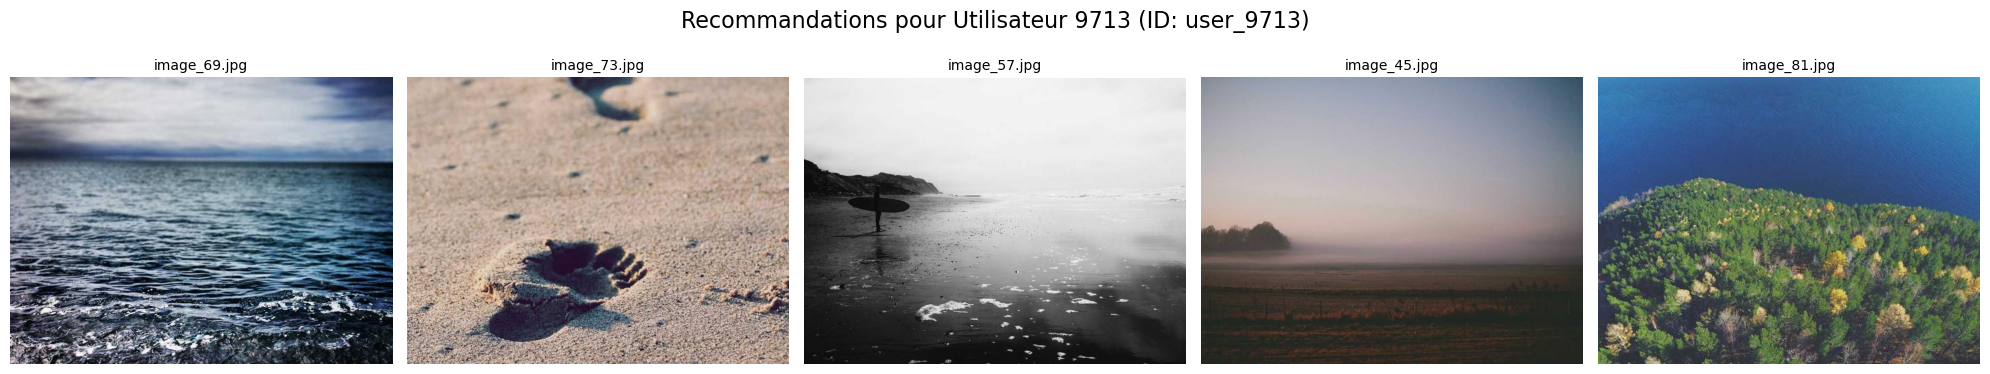

In [15]:
afficher_images_recommandees(reco_images, dossier_images="images", titre=f"Recommandations pour {profil_cible['nom']} (ID: {profil_cible['id']})")

## Tests unitaires et de validation du système
Les cellules suivantes permettent de vérifier que les fonctions principales du système de recommandation d’images fonctionnent correctement.

In [16]:
# Test de la présence des variables principales
assert isinstance(historique, dict), "La variable 'historique' doit être un dictionnaire."
assert isinstance(profils, list), "La variable 'profils' doit être une liste."
assert isinstance(profil_cible, dict), "La variable 'profil_cible' doit être un dictionnaire."
assert isinstance(reco_images, list), "La variable 'reco_images' doit être une liste."
assert isinstance(image_folder, str), "La variable 'image_folder' doit être une chaîne de caractères."

print("Test des variables principales : OK")

Test des variables principales : OK


In [21]:
# Exemple de test de recommandation (à adapter selon vos fonctions)
def test_recommandation():
    
    # Appelle la fonction de recommandation (à adapter selon votre code)
    images = reco_images  # Remplacez par l'appel à votre fonction si besoin
    assert isinstance(images, list), "La recommandation doit retourner une liste d'images."
    print("Test de la fonction de recommandation : OK")

test_recommandation()

Test de la fonction de recommandation : OK


In [22]:
# Test : chaque profil doit avoir un identifiant unique
ids = [profil.get('id') for profil in profils]
assert len(ids) == len(set(ids)), "Chaque profil doit avoir un identifiant unique."
print("Test unicité des identifiants de profils : OK")

# Test : la liste des images recommandées ne doit pas être vide
assert len(reco_images) > 0, "La liste des images recommandées ne doit pas être vide."
print("Test présence d'images recommandées : OK")

# Test : le dossier d'images doit exister
import os
assert os.path.exists(image_folder), f"Le dossier d'images '{image_folder}' n'existe pas."
print("Test existence du dossier d'images : OK")

Test unicité des identifiants de profils : OK
Test présence d'images recommandées : OK
Test existence du dossier d'images : OK
